<hr/>

# Introduction to Data Science
**Tamás Budavári** - budavari@jhu.edu <br/>

- Classification problems
- Nearest Neighbors (NN, $k$-NN)

<hr/>

<h1><font color="darkblue">Classification</font></h1>

- Based on a **training set** of labeled points, assign class labels to unknown vectors in the **query set**.  

> **Training set**
><br><br>
>$T = \big\{ (x_i, C_i) \big\}$ where $x_i\in \mathbb{R}^d$ and $C_i$ is the known class membership 

> **Query set**
><br><br>
>$Q = \big\{ x_i \big\}$ where $x_i\in \mathbb{R}^d$ 

> For example,
> blood tests ($x$) and sick/healthy ($C$) - we want to predict if a new patient is sick based on the available measurements

- Similar to regression but with discrete categories to classify into...

### Classification Methods

- $k$-NN
- Naive Bayes
- Quadratic Discriminant Analysis
- Logistic regression
- Decisions trees
- Random forests
- Support Vector Machines

### The Iris Dataset

We'll use this data set available in [scikit-learn](http://scikit-learn.org/stable/index.html), see [this](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) page for details

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import datasets

iris = datasets.load_iris()

[k for k in iris]

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [3]:
print (iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [7]:
print (type(iris.data))
print (iris.data.shape)

# have a peek
print (iris.data[:5])
print (iris.target[:5])

<class 'numpy.ndarray'>
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [8]:
iris.target==1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [9]:
(iris.target==1).sum()

50

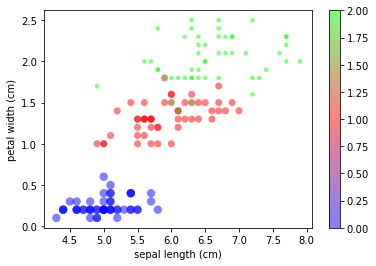

In [10]:
# plot two features
i,j = 0,3

sizes = np.array([70,50,20])
plt.scatter(iris.data[:,i], iris.data[:,j], edgecolor='none', 
            c=iris.target, s=sizes[iris.target], cmap=cm.brg, alpha=0.5); 
colorbar();
xlabel(iris.feature_names[i]);
ylabel(iris.feature_names[j]);

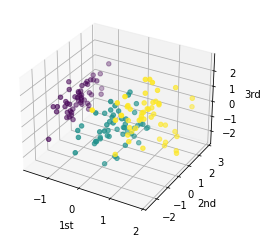

In [11]:
# see also http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# whiten the data and use top 3 components
pca = PCA(n_components=3,whiten=True)
b = pca.fit_transform(iris.data)

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(b[:,0], b[:,1], b[:,2], c=iris.target)
ax.set_xlabel("1st");
ax.set_ylabel("2nd");
ax.set_zlabel("3rd");


### Nearest Neighbor


- Assign label or value of nearest neighbor (NN) in the training set

> Simple but powerful
> <br>
> <img src="files/KnnClassification.svg" width=200 align=center>


In [12]:
# naive and very slow nearest neighbor search
# for illustration purposes only...
import datetime as dt

X = iris.data[:,:]
y = iris.target

print ('Unique classes:', np.unique(iris.target))

Unique classes: [0 1 2]


In [13]:
y_pred = -1 * np.ones(X.shape[0])

start = dt.datetime.now()

# loop on query set
for i in np.arange(y.size): 
    
    d2min = 1e99  # something large
    
    # loop on training set
    for j in np.arange(y.size):
        if i != j:               # leave one out
            d = X[i,:] - X[j,:]  # diff vector
            d2 = d.dot(d)        # its length squared
            if d2 < d2min:       # check if closer
                d2min = d2       # save it 
                y_pred[i] = y[j]

print ('Elapsed time', dt.datetime.now() - start)

print ("Number of mislabeled points out of a total %d points: %d" 
       % (iris.target.size, (y!=y_pred).sum()))

# write a faster version of this

Elapsed time 0:00:00.057999
Number of mislabeled points out of a total 150 points: 6


### $k$ Nearest Neighbors

- Assign label or value based $k$ nearest neighbors ($k$-NN) in the training set

> For example, the most frequent "vote" <br/> possibly with weighting
> <br>
> <img src="files/KnnClassification.svg" width=200>

- Using $k$ instead of a distance cutoff helps with large density contrasts



In [14]:
from sklearn import neighbors

X = iris.data[:,:2] # using only 2 features for each
y = iris.target

start = dt.datetime.now()
clf = neighbors.KNeighborsClassifier(4)
clf.fit(X,y)
y_pred = clf.predict(X)

print ("Elapsed time", dt.datetime.now()-start)
print("Number of mislabeled points out of a total %d points: %d"
      % (iris.target.size, (iris.target!=y_pred).sum()))

Elapsed time 0:00:00.005006
Number of mislabeled points out of a total 150 points: 26


In [15]:
clf?

### Where did we cheat?

- Can you spot the problem with the code above?

### Evaluate on a grid

- Create a mesh of points with resolution $h$
- Plot classification results for each grid point
- Visualize results
- Do it for different $k$NN weighting schemes

In [16]:
# creating a grid of points 
gx,gy = np.meshgrid([1,2,3], [10,20])
print (gx)
print (gy)

[[1 2 3]
 [1 2 3]]
[[10 10 10]
 [20 20 20]]


In [17]:
gx.ravel(),

(array([1, 2, 3, 1, 2, 3]),)

In [18]:
np.c_[gx.ravel(), gy.ravel()]

array([[ 1, 10],
       [ 2, 10],
       [ 3, 10],
       [ 1, 20],
       [ 2, 20],
       [ 3, 20]])

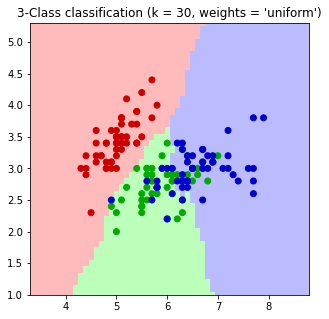

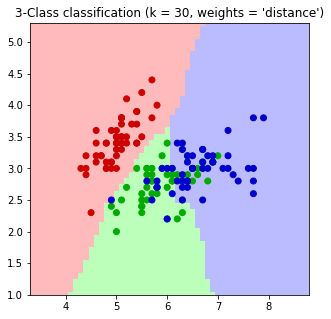

In [19]:
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])

n_neighbors = 30

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:,:2]  # we only take the first two features
y = iris.target

h = 0.1 # step size in the mesh

# Points in a mesh of [x_min, m_max] x [y_min, y_max]
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

for weights in ['uniform', 'distance']:
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    Z = clf.predict(grid)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5,5))
    if False:
        plt.scatter(xx, yy, c=Z, cmap=cmap_light, edgecolor='none')
    else:
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

### Exercise / Unhomework 

- Which two features work best to predict the classes of the iris dataset?
- How much better/worse than using all features

### Other examples

More [exercises](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#examples-using-sklearn-neighbors-kneighborsclassifier) are available at http://scikit-learn.org

### Meaningful Distance?

- Need a distance function

> E.g., use Euclidean distance in $\mathbb{R}^d$

- Problem with different features and units

> In practice, **centering** and **scaling** often helps <br/>
> Arguably, black art...


### Curse of Dimensionality

- Everybody is lonely in high dimensions

> Surface / Volume ratio grows <br/>as function of $d$, the dimension
